In [317]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [318]:
df=pd.read_excel('BBDD_Hospitalización.xlsx') # leer tabla y revisar
df.head()

/home/frangr94/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [319]:
# ver na: estos registros no son muy útiles ni imputables --> borrar
print(df[df.isna()])
df.dropna(inplace=True) 

     EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES  PSA BIOPSIAS PREVIAS  \
0     NaN      NaN                        NaN  NaN              NaN   
1     NaN      NaN                        NaN  NaN              NaN   
2     NaN      NaN                        NaN  NaN              NaN   
3     NaN      NaN                        NaN  NaN              NaN   
4     NaN      NaN                        NaN  NaN              NaN   
..    ...      ...                        ...  ...              ...   
565   NaN      NaN                        NaN  NaN              NaN   
566   NaN      NaN                        NaN  NaN              NaN   
567   NaN      NaN                        NaN  NaN              NaN   
568   NaN      NaN                        NaN  NaN              NaN   
569   NaN      NaN                        NaN  NaN              NaN   

    VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
0                  NaN                                     NaN   
1              

In [320]:
df.rename(columns={'EDAD':'edad',
                   'DIABETES':'diabetes',
                   'HOSPITALIZACIÓN ULTIMO MES':'hospitalizacionUltimoMes',
                   'PSA':'psa',
                   'BIOPSIAS PREVIAS':'biopsiasPrevias',
                   'VOLUMEN PROSTATICO':'volumenProstatico',
                   'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS':'antibioticoProfilaxis',
                   'NUMERO DE MUESTRAS TOMADAS':'muestrasTomadas',
                   'CUP':'cup',
                   'ENF. CRONICA PULMONAR OBSTRUCTIVA':'enfCronicaObstructiva',
                   'BIOPSIA':'biopsia',
                   'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA':'diasComplicacionPostBiopsia',
                   'FIEBRE':'fiebre',
                   'TIPO DE CULTIVO':'tipoCultivo',
                   'AGENTE AISLADO':'agenteAislado',
                   'PATRON DE RESISTENCIA':'patronResistencia',
                   'HOSPITALIZACION':'hospitalizacion',
                   'DIAS HOSPITALIZACION MQ': 'diasHospitalizacionMQ',
                   'DIAS HOSPITALIZACIÓN UPC':'diasHospitalizacionUPC',
                   'ITU':'itu'
                   }, inplace=True) # renombrar columnas para facilitar el trabajo en el dataset

In [321]:
# ya que dias de hospitalizacion MQ/UPC suceden con posterioridad al hecho que queremos pronosticar (si el paciente sera internado), las dropeamos
# es decir, no explican si un paciente quedará hospitalizado o no
df.drop(columns=['diasHospitalizacionMQ','diasHospitalizacionUPC'],inplace=True)

array([[<Axes: title={'center': 'edad'}>,
        <Axes: title={'center': 'psa'}>],
       [<Axes: title={'center': 'muestrasTomadas'}>, <Axes: >]],
      dtype=object)

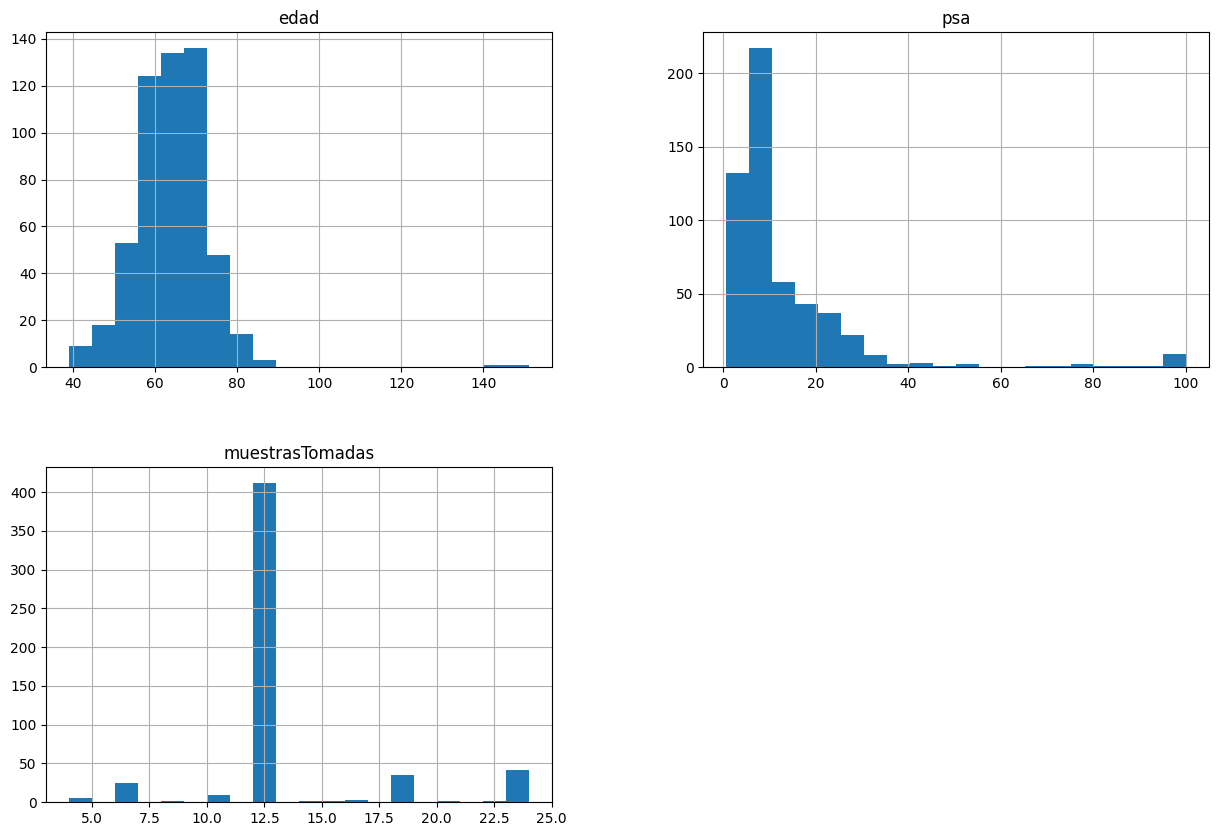

In [322]:
# ver histogramas para todos los campos numericos
df.hist(bins=20,figsize=(15,10)) 

In [323]:
# hay valores extraños en estas columnas que parecen outliers

def detect_outliers(data):
    outliers=[]
    threshold=3
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers


In [324]:
# ver outliers
out_psa = detect_outliers(df.psa)

print('outliers en psa',out_psa)
# edad
out_edad = detect_outliers(df.edad)
print('outliers en edad',out_edad)


# muestras tomadas
out_mues = detect_outliers(df.muestrasTomadas)
print('outliers en muestrasTomadas',out_mues)




outliers en psa [91.8, 98.0, 90.0, 100.0, 98.0, 98.0, 100.0, 83.0, 76.0, 70.0, 100.0, 100.0, 98.0, 98.0, 78.0, 75.0]
outliers en edad [143.0, 151.0]
outliers en muestrasTomadas []


In [325]:
df.drop(df[df['edad']>=min(out_edad)].index,inplace=True)
df.drop(df[df['psa']>=min(out_psa)].index,inplace=True)

array([[<Axes: title={'center': 'edad'}>,
        <Axes: title={'center': 'psa'}>],
       [<Axes: title={'center': 'muestrasTomadas'}>, <Axes: >]],
      dtype=object)

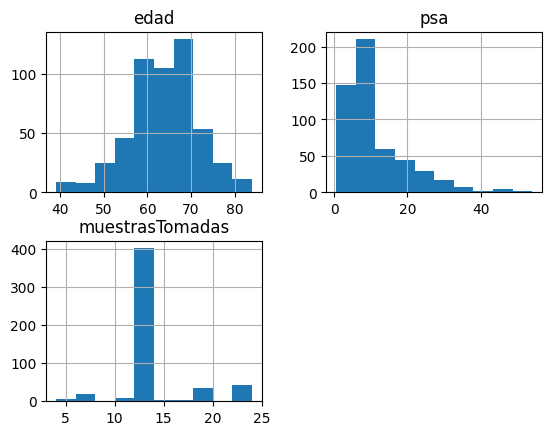

In [326]:
df.hist()

In [327]:
# ya que psa está muy sesgada a la derecha, le aplicaremos log(x) para suavizarla
df['psa'] = np.log(df['psa'])

In [328]:
# dado que las categorias de biopsia son distintas patologias con distintas gravedades, hay que mappear a mano
df.biopsia.unique()
df.biopsia=df.biopsia.str.strip()

scale_mapper = {
    "NEG":0,
    "PROSTATITIS":1,
    "HIPERPLASIA PROSTATICA":2,
    "ADENOCARCINOMA GLEASON 6":4,
    "ADENOCARCINOMA GLEASON 7":5,
    "ADENOCARCINOMA GLEASON 8":6,
    "ADENOCARCINOMA GLEASON 9":7,
    "ADENOCARCINOMA GLEASON 10":8,
    "CARCINOMA INDIFERENCIADO DE CELULAS CLARAS":9      
                }

df['biopsia_n']=df.biopsia.replace(scale_mapper)
df.drop(columns='biopsia',inplace=True)

In [329]:
# cambio no por 0, dado que el resto de los datos son numéricos
df['diasComplicacionPostBiopsia']=df['diasComplicacionPostBiopsia'].replace('NO',0)
df['diasComplicacionPostBiopsia']=df['diasComplicacionPostBiopsia'].astype(int)

In [330]:
# habria que cambiar las variables categoricas a numericas
# separo categoricas de numericas / variable objetivo
df_num = pd.DataFrame(df.select_dtypes([int,float])).reset_index()
df_cat = pd.DataFrame(df.select_dtypes(object)).reset_index()

In [331]:
df_cat_ohe=pd.DataFrame()
for i in df_cat:
    if i!='index':
        if df[i].value_counts().count()>2:
            scaled = pd.get_dummies(df_cat[i],dtype=int,prefix=i)
            for z in scaled:
                df_cat_ohe[z]=scaled[z]
        else:
            df_cat_ohe[i]=pd.Categorical(df[i]).codes
    else:
        df_cat_ohe[i]=df_cat[i]

In [332]:
df = df_num.merge(df_cat_ohe, on='index')

In [333]:
df

,index,edad,psa,muestrasTomadas,diasComplicacionPostBiopsia,biopsia_n,diabetes,hospitalizacionUltimoMes,biopsiasPrevias,volumenProstatico,...,tipoCultivo_UROCULTIVO,agenteAislado_E.COLI,agenteAislado_NO,agenteAislado_PSEUDOMONAS AERUGINOSA,"patronResistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R",patronResistencia_MULTI SENSIBLE,patronResistencia_NO,"patronResistencia_RESISTENTE A AMPI, CIPRO Y GENTA","patronResistencia_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA",hospitalizacion
0,0,53.0,1.386294,12.0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1,1,56.0,2.041220,12.0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
2,2,57.0,3.367296,24.0,1,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
3,3,56.0,1.945910,12.0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,4,55.0,3.367296,24.0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,559,70.0,2.890372,12.0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
519,560,57.0,1.568616,12.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
520,562,78.0,2.230014,12.0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
521,563,67.0,1.791759,12.0,0,4,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [334]:
# ahora voy a revisar las correlaciones
corr = df.corr()
corr

,index,edad,psa,muestrasTomadas,diasComplicacionPostBiopsia,biopsia_n,diabetes,hospitalizacionUltimoMes,biopsiasPrevias,volumenProstatico,...,tipoCultivo_UROCULTIVO,agenteAislado_E.COLI,agenteAislado_NO,agenteAislado_PSEUDOMONAS AERUGINOSA,"patronResistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R",patronResistencia_MULTI SENSIBLE,patronResistencia_NO,"patronResistencia_RESISTENTE A AMPI, CIPRO Y GENTA","patronResistencia_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA",hospitalizacion
index,1.000000,0.043398,-0.044881,-0.009544,-0.307473,0.045176,0.020555,-0.151525,-0.005156,-0.007010,...,-0.150026,-0.189815,0.216555,-0.103103,-0.078383,-0.103103,0.201691,-0.108658,-0.108275,-0.371349
edad,0.043398,1.000000,0.280059,-0.208454,0.074476,0.294969,0.151782,-0.025736,-0.087692,0.257342,...,-0.024683,-0.061329,0.031052,0.044071,-0.036127,0.044071,0.015168,-0.078911,0.032170,-0.049256
psa,-0.044881,0.280059,1.000000,-0.087758,-0.042414,0.166313,0.006928,-0.040914,0.045408,0.118423,...,0.018797,0.035822,-0.052862,0.043306,0.078476,0.043306,-0.026624,-0.016774,-0.032506,-0.070884
muestrasTomadas,-0.009544,-0.208454,-0.087758,1.000000,0.047919,-0.151481,-0.060309,0.032581,0.391963,-0.103424,...,0.042524,0.079610,-0.107970,0.077336,0.121495,0.077336,-0.069126,-0.017313,-0.017313,0.082521
diasComplicacionPostBiopsia,-0.307473,0.074476,-0.042414,0.047919,1.000000,0.004067,0.056365,0.033189,-0.043583,0.049678,...,0.382686,0.213401,-0.381622,0.390637,0.048852,0.390637,-0.389005,0.149524,0.149524,0.626465
biopsia_n,0.045176,0.294969,0.166313,-0.151481,0.004067,1.000000,0.029801,-0.013712,-0.059834,-0.079257,...,0.019753,-0.084856,0.035065,0.076684,-0.034476,0.076684,0.024344,-0.048803,-0.048803,-0.100948
diabetes,0.020555,0.151782,0.006928,-0.060309,0.056365,0.029801,1.000000,0.024756,-0.062552,0.103123,...,0.035700,-0.039507,-0.002488,0.073113,-0.016051,0.073113,-0.008759,-0.022722,-0.022722,0.065582
hospitalizacionUltimoMes,-0.151525,-0.025736,-0.040914,0.032581,0.033189,-0.013712,0.024756,1.000000,-0.032645,-0.024126,...,-0.008625,-0.010584,0.012245,-0.006087,-0.004300,-0.006087,0.011443,-0.006087,-0.006087,0.074759
biopsiasPrevias,-0.005156,-0.087692,0.045408,0.391963,-0.043583,-0.059834,-0.062552,-0.032645,1.000000,-0.070313,...,-0.029170,0.084210,-0.062716,-0.020587,0.131727,-0.020587,-0.016905,-0.020587,-0.020587,-0.008938
volumenProstatico,-0.007010,0.257342,0.118423,-0.103424,0.049678,-0.079257,0.103123,-0.024126,-0.070313,1.000000,...,0.055932,0.068635,-0.079407,0.039474,0.027886,0.039474,-0.074206,0.039474,0.039474,0.033758


In [335]:
# voy a visualizar de esta forma --> parece que no hay variables con correlacion excesiva
corr['hospitalizacion'].sort_values(ascending=False)

hospitalizacion                                                                                      1.000000
fiebre                                                                                               0.678347
diasComplicacionPostBiopsia                                                                          0.626465
agenteAislado_E.COLI                                                                                 0.502286
itu                                                                                                  0.502286
tipoCultivo_UROCULTIVO                                                                               0.409324
tipoCultivo_HEMOCULTIVO Y UROCULTIVO                                                                 0.288880
patronResistencia_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA    0.288880
tipoCultivo_HEMOCULTIVO                                                                              0.288880
patronResi

In [336]:
# voy a quitar algunas variables que parecen irrelevantes con el fin de optimizar recursos: me voy a llevar todas las que tengan una correlation
# minimamente significativa (0.05)

corr=df.corr()
hosp_corr=corr['hospitalizacion']
hosp_corr=pd.DataFrame(hosp_corr)
hosp_corr_neg = hosp_corr[hosp_corr['hospitalizacion']<-0.05]
hosp_corr=hosp_corr[hosp_corr['hospitalizacion']>0.05]
hosp_corr=pd.concat([hosp_corr,hosp_corr_neg])
df = df[hosp_corr.index.values]


In [337]:
# index no sirve ya que no es una variable, complicacion post es algo ambigua en su definicion
# ¿quien define cuando se ha presentado la infeccion? ¿el medico o el paciente cuando se percata de la misma?
# biopsia_n esta directamente relacionado con la gravedad del cuadro por lo que probablemente overfitea el modelo
# la fiebre es una consecuencia directa de las infecciones en el tracto urinario

df.drop(columns=['index','diasComplicacionPostBiopsia','biopsia_n','fiebre'],inplace=True) 

/tmp/ipykernel_42417/2051399156.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['index','diasComplicacionPostBiopsia','biopsia_n','fiebre'],inplace=True)


In [338]:
df

,muestrasTomadas,diabetes,hospitalizacionUltimoMes,antibioticoProfilaxis_OROQUINOLONAS,itu,tipoCultivo_HEMOCULTIVO,tipoCultivo_HEMOCULTIVO Y UROCULTIVO,tipoCultivo_UROCULTIVO,agenteAislado_E.COLI,agenteAislado_PSEUDOMONAS AERUGINOSA,"patronResistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R",patronResistencia_MULTI SENSIBLE,"patronResistencia_RESISTENTE A AMPI, CIPRO Y GENTA","patronResistencia_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA",hospitalizacion,psa,antibioticoProfilaxis_OTROS,tipoCultivo_NO,agenteAislado_NO,patronResistencia_NO
0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.386294,0,1,1,1
1,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.041220,0,1,1,1
2,24.0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,3.367296,0,0,0,0
3,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.945910,0,1,1,1
4,24.0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,3.367296,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,12.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.890372,0,1,1,1
519,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.568616,1,1,1,1
520,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.230014,0,1,1,1
521,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.791759,0,1,1,1


In [339]:
df.to_csv('hospitalizacion_modelado.csv',index=False)